<center><h1>Brain Tumor Detection 🧠</h1><center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
import warnings
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

import os
import seaborn as sns
import zipfile
from skimage import io
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow.keras.backend as K
import random
import glob
from sklearn.preprocessing import StandardScaler, normalize
from IPython.display import display

# Loading the Data

We load the data by making use of the tool image_dataset_from directory. It helps us fetch the data from the relevant directory, automatically does labeling, shuffles the data, batches the data (in this case as 32) and resizes images into 256 by 256.

In [2]:
data = keras.utils.image_dataset_from_directory("../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset")

Found 253 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data directory
data_dir = "../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

# Define image data generators for training and testing
batch_size = 32
image_size = (224, 224)

# Create data generator for preprocessing and training
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to the [0, 1] range
    rotation_range=15,  # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,  # Randomly shift the width of images
    height_shift_range=0.1,  # Randomly shift the height of images
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # How to fill newly created pixels after rotations or shifts
    validation_split=0.2,
)

train_generator = train_data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # You may need to adjust this depending on your data
    subset='training',
)

# Now, you can use train_generator in your model for training.
# Create a data generator for preprocessing the test set
test_data_gen = ImageDataGenerator(
    rescale=1.0 / 255  # Rescale pixel values to the [0, 1] range
)

test_generator = test_data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # You may need to adjust this depending on your data
    subset='validation'  # Use the validation subset for testing
)

# Now, you can use test_generator to evaluate your model.

In [37]:
#svm
import tensorflow as tf
from tensorflow import keras
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the data directory path
data_dir = "../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

# Load the dataset using image_dataset_from_directory
data = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",  # You may need to adjust this depending on your data
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=1337  # Add a seed for reproducibility
)

# Create a data generator for the test set
test_data = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",  # You may need to adjust this depending on your data
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=1337  # Use the same seed for consistency
)

# Extract features and labels from the data and test_data
X_train, y_train = [], []
for images, labels in data:
    features = images.numpy().reshape(images.shape[0], -1)  # Flatten each image
    X_train.extend(features)
    y_train.extend(labels.numpy())
X_train, y_train = tf.convert_to_tensor(X_train), tf.convert_to_tensor(y_train)

X_test, y_test = [], []
for images, labels in test_data:
    features = images.numpy().reshape(images.shape[0], -1)  # Flatten each image
    X_test.extend(features)
    y_test.extend(labels.numpy())
X_test, y_test = tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Accuracy: 74.00%


In [38]:
#random forest algorithm 
from sklearn.ensemble import RandomForestClassifier


In [39]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1337)  # You can adjust hyperparameters as needed
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1337)

In [40]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

In [41]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 80.00%


In [42]:
#K-NN algorithm
from sklearn.neighbors import KNeighborsClassifier

# Train a K-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)

# Make predictions using the K-NN classifier
y_pred_knn = knn_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-NN Accuracy: {accuracy_knn * 100:.2f}%")


K-NN Accuracy: 60.00%


In [43]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions using the Naive Bayes classifier
y_pred_naive_bayes = naive_bayes_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Accuracy: {accuracy_naive_bayes * 100:.2f}%")


Naive Bayes Accuracy: 72.00%


In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Make predictions using the Decision Tree classifier
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree * 100:.2f}%")


Decision Tree Accuracy: 74.00%


In [45]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)

# Make predictions using the Logistic Regression classifier
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"Logistic Regression Accuracy: {accuracy_logistic_regression * 100:.2f}%")


Logistic Regression Accuracy: 74.00%


In [3]:
batch = data.as_numpy_iterator().next() # tumor labeled 1,& no tumor labeled 0

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


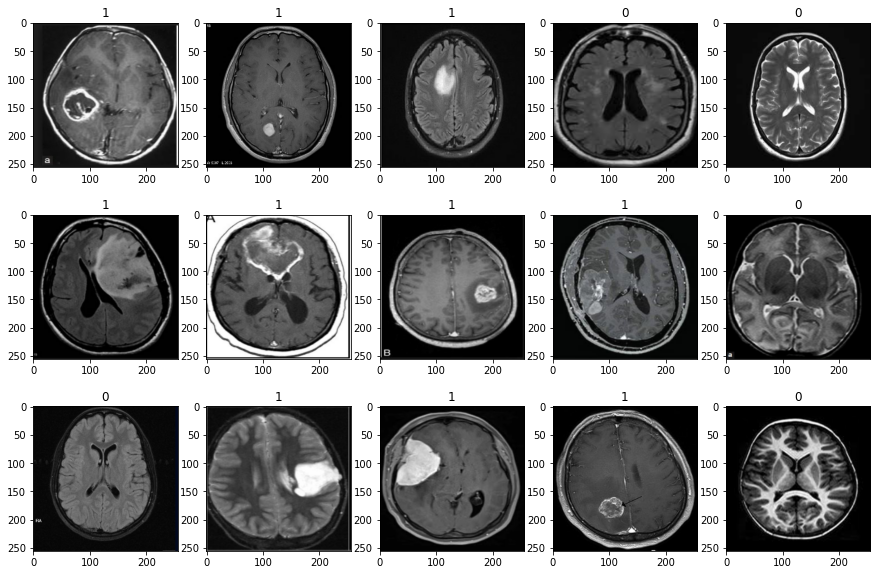

In [4]:
fig, ax = plt.subplots(3, 5, figsize=(15,10))
ax = ax.flatten() #flatten used to convert multi-dimensional arrays (often referred to as tensors) 
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


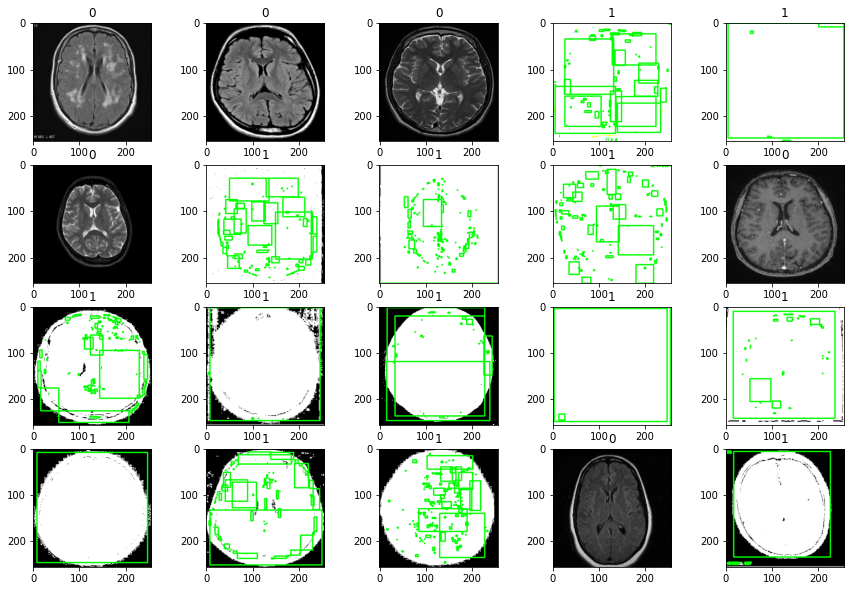

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming batch[0] contains the images and batch[1] contains the labels (1 for tumor, 0 for no tumor)
batch = data.as_numpy_iterator().next()

fig, ax = plt.subplots(4, 5, figsize=(15, 10))
ax = ax.flatten()

for idx, img in enumerate(batch[0][:20]):
    # Display the image
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

    if batch[1][idx] == 1:
        # If the label is 1 (indicating a tumor), create a binary mask
        binary_mask = (img[:, :, 0] > 128).astype(np.uint8)  # Convert to binary

        # Find contours of the binary mask (should be a single contour)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw a bounding rectangle around the tumor area
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

        ax[idx].imshow(img)

plt.show()


# Data Scaling

Since our data consists of images and images consist of pixels, we divide all the pixel values by 255—each pixel can have a value in [0, 255]— so that all the pixel values are on the same scale i.e. [0, 1].

In [6]:
data = data.map(lambda x,y: (x/255, y))
data

<MapDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [7]:
batch = data.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [8]:
print("Minimum value of the scaled data:", batch[0].min())
print("Maximum value of the scaled data:", batch[0].max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


# Train-Validation-Test Split

In [9]:
print("There are", len(data), "batches in our data")

There are 8 batches in our data


Now, we have to divide the whole data into 3 separate sets: Train set for training the model, Validation set for adjusting the hyperparameters of our model and Test set for evaluating our model on the set that our model has not seen before. As it can be seen, we have 8 batches in our data. I preferred allocating 4 batches for Train set, 2 batches for Validation set and 2 batches for Test set.

In [10]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.2)+1

In [11]:
print("Train Size:", train_size)
print("Validation Size:", val_size)
print("Test Size:", test_size)

print("Sum of Train, Validation and Test sizes is equal to:", train_size + val_size + test_size)

Train Size: 4
Validation Size: 2
Test Size: 2
Sum of Train, Validation and Test sizes is equal to: 8


In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Data Augmentation

Because our Train set has relatively small number of images, we can apply data augmentation which is reproducing the images by applying some changes such as random rotating, random flipping, random zoom and random contrast. This may possibly increase the accuracy score of the model. Since we will be applying the data augmentation in the beginning of the neural network architecture, we should pass the input shape.

Note: Data augmentation will be inactive when testing the data. Input images will be augmented during calls to model.fit (not model.evaluate or model.predict). If you want to learn more about data augmentation in Tensorflow, you can check the official documentation.

In [13]:
batch = data.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


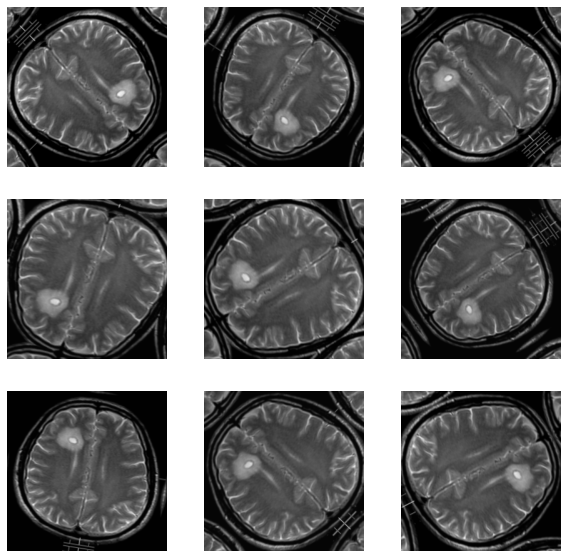

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.2)
])

image = batch[0]


plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

# Building Deep Learning Model

In [15]:
model = Sequential([
    data_augmentation,
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [16]:
model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)       

In [18]:
history1 = model.fit(train, epochs=15, validation_data=val)
history1

Epoch 1/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.6656 - accuracy: 0.6875

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 9s 259ms/step - loss: 0.6656 - accuracy: 0.6875 - val_loss: 0.6476 - val_accuracy: 0.5938


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 2/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/4 [==============>...............] - ETA: 0s - loss: 0.6265 - accuracy: 0.6406

Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.6328

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 175ms/step - loss: 0.6024 - accuracy: 0.6328 - val_loss: 0.6293 - val_accuracy: 0.6406


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 3/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5739 - accuracy: 0.7031

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 199ms/step - loss: 0.5739 - accuracy: 0.7031 - val_loss: 0.6123 - val_accuracy: 0.7031


Cleanup called...
Cleanup called...


Epoch 4/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5355 - accuracy: 0.7500

Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5351 - accuracy: 0.7422

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 180ms/step - loss: 0.5351 - accuracy: 0.7422 - val_loss: 0.5234 - val_accuracy: 0.7344
Epoch 5/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5513 - accuracy: 0.7500

Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5388 - accuracy: 0.7422

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 185ms/step - loss: 0.5388 - accuracy: 0.7422 - val_loss: 0.4710 - val_accuracy: 0.8125


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 6/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.6122 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 178ms/step - loss: 0.6122 - accuracy: 0.7188 - val_loss: 0.5753 - val_accuracy: 0.7656
Epoch 7/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5671 - accuracy: 0.7292

Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5531 - accuracy: 0.7734

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 176ms/step - loss: 0.5531 - accuracy: 0.7734 - val_loss: 0.4749 - val_accuracy: 0.8594


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 8/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.4991 - accuracy: 0.7734

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 173ms/step - loss: 0.4991 - accuracy: 0.7734 - val_loss: 0.5425 - val_accuracy: 0.7500
Epoch 9/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/4 [==============>...............] - ETA: 0s - loss: 0.6528 - accuracy: 0.6719

Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.7422

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 182ms/step - loss: 0.5420 - accuracy: 0.7422 - val_loss: 0.5919 - val_accuracy: 0.7188


Cleanup called...
Cleanup called...


Epoch 10/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/4 [======>.......................] - ETA: 1s - loss: 0.7579 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5612 - accuracy: 0.7344

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 212ms/step - loss: 0.5612 - accuracy: 0.7344 - val_loss: 0.5430 - val_accuracy: 0.7812
Epoch 11/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/4 [==============>...............] - ETA: 0s - loss: 0.5105 - accuracy: 0.7969

Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5576 - accuracy: 0.7422

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 184ms/step - loss: 0.5576 - accuracy: 0.7422 - val_loss: 0.4659 - val_accuracy: 0.8125


Cleanup called...
Cleanup called...


Epoch 12/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6025 - accuracy: 0.6667

Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5971 - accuracy: 0.6953

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 182ms/step - loss: 0.5971 - accuracy: 0.6953 - val_loss: 0.4320 - val_accuracy: 0.8750


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 13/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5242 - accuracy: 0.7969

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 170ms/step - loss: 0.5242 - accuracy: 0.7969 - val_loss: 0.4381 - val_accuracy: 0.8438


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 14/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.5826 - accuracy: 0.7031

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 181ms/step - loss: 0.5826 - accuracy: 0.7031 - val_loss: 0.3875 - val_accuracy: 0.8594


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 15/15


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - ETA: 0s - loss: 0.4995 - accuracy: 0.7578

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 180ms/step - loss: 0.4995 - accuracy: 0.7578 - val_loss: 0.4551 - val_accuracy: 0.8594


Cleanup called...


In [19]:
# Initialize the CNN
cnn = tf.keras.models.Sequential([data_augmentation])

# 1st layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # Pooling

# 2nd layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())  # Flattening

# Add LSTM layer
cnn.add(tf.keras.layers.Reshape((1, cnn.output_shape[-1])))  # Reshape the input for LSTM
cnn.add(tf.keras.layers.LSTM(units=64, activation='relu'))

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
cnn.fit(x = train, validation_data = val, epochs = 30)

Epoch 1/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 2.3506 - accuracy: 0.5312

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 3s 232ms/step - loss: 1.9732 - accuracy: 0.5703 - val_loss: 0.8739 - val_accuracy: 0.6406


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 2/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6771 - accuracy: 0.6771

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 149ms/step - loss: 0.6617 - accuracy: 0.6953 - val_loss: 0.6677 - val_accuracy: 0.5312
Epoch 3/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6330 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 152ms/step - loss: 0.6392 - accuracy: 0.6719 - val_loss: 0.5989 - val_accuracy: 0.7656
Epoch 4/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5765 - accuracy: 0.7292

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 193ms/step - loss: 0.6128 - accuracy: 0.6875 - val_loss: 0.5695 - val_accuracy: 0.7031


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 5/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5357 - accuracy: 0.6771

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 162ms/step - loss: 0.5415 - accuracy: 0.6875 - val_loss: 0.4806 - val_accuracy: 0.8125


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 6/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5230 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 177ms/step - loss: 0.5482 - accuracy: 0.7422 - val_loss: 0.4128 - val_accuracy: 0.8594


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 7/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6591 - accuracy: 0.6771

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 160ms/step - loss: 0.6019 - accuracy: 0.7031 - val_loss: 0.5963 - val_accuracy: 0.8125


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 8/30
1/4 [======>.......................] - ETA: 0s - loss: 0.5161 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5196 - accuracy: 0.7708

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 166ms/step - loss: 0.5650 - accuracy: 0.7500 - val_loss: 0.5079 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 9/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5911 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 159ms/step - loss: 0.5458 - accuracy: 0.7734 - val_loss: 0.5097 - val_accuracy: 0.7500


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 10/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5632 - accuracy: 0.6979

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 173ms/step - loss: 0.5868 - accuracy: 0.6875 - val_loss: 0.4776 - val_accuracy: 0.8438


Cleanup called...
Cleanup called...


Epoch 11/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5757 - accuracy: 0.7292

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 153ms/step - loss: 0.5690 - accuracy: 0.7422 - val_loss: 0.4339 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 12/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5630 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 158ms/step - loss: 0.5685 - accuracy: 0.7109 - val_loss: 0.5200 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 13/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5521 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 167ms/step - loss: 0.5317 - accuracy: 0.7812 - val_loss: 0.4789 - val_accuracy: 0.8281
Epoch 14/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4592 - accuracy: 0.8125

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 162ms/step - loss: 0.4534 - accuracy: 0.8125 - val_loss: 0.5482 - val_accuracy: 0.7969
Epoch 15/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4385 - accuracy: 0.8333

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 164ms/step - loss: 0.4917 - accuracy: 0.7969 - val_loss: 0.7888 - val_accuracy: 0.6562


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 16/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6053 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 156ms/step - loss: 0.5949 - accuracy: 0.7344 - val_loss: 0.4800 - val_accuracy: 0.7969
Epoch 17/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4379 - accuracy: 0.8021

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 189ms/step - loss: 0.4547 - accuracy: 0.7969 - val_loss: 0.5055 - val_accuracy: 0.8125


Cleanup called...
Cleanup called...


Epoch 18/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4789 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 171ms/step - loss: 0.5106 - accuracy: 0.7188 - val_loss: 0.4734 - val_accuracy: 0.8438


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 19/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5569 - accuracy: 0.7083

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 172ms/step - loss: 0.5635 - accuracy: 0.6875 - val_loss: 0.5100 - val_accuracy: 0.7812


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 20/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7604

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 168ms/step - loss: 0.4987 - accuracy: 0.7891 - val_loss: 0.4327 - val_accuracy: 0.8281


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 21/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5188 - accuracy: 0.7292

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 148ms/step - loss: 0.4949 - accuracy: 0.7500 - val_loss: 0.3004 - val_accuracy: 0.9219


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 22/30
1/4 [======>.......................] - ETA: 0s - loss: 0.4403 - accuracy: 0.8438

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5543 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 158ms/step - loss: 0.5630 - accuracy: 0.7188 - val_loss: 0.4210 - val_accuracy: 0.8281
Epoch 23/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4902 - accuracy: 0.8021

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 157ms/step - loss: 0.4551 - accuracy: 0.8125 - val_loss: 0.4906 - val_accuracy: 0.7656
Epoch 24/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5058 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 148ms/step - loss: 0.4846 - accuracy: 0.7734 - val_loss: 0.3897 - val_accuracy: 0.8594
Epoch 25/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4250 - accuracy: 0.8125

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 147ms/step - loss: 0.4379 - accuracy: 0.8125 - val_loss: 0.4672 - val_accuracy: 0.7656
Epoch 26/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4689 - accuracy: 0.7604

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 194ms/step - loss: 0.5003 - accuracy: 0.7578 - val_loss: 0.3172 - val_accuracy: 0.8906


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 27/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4714 - accuracy: 0.8229

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 154ms/step - loss: 0.4935 - accuracy: 0.8047 - val_loss: 0.5462 - val_accuracy: 0.7812
Epoch 28/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5743 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 159ms/step - loss: 0.5509 - accuracy: 0.7500 - val_loss: 0.3580 - val_accuracy: 0.8438


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 29/30
1/4 [======>.......................] - ETA: 0s - loss: 0.6163 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4820 - accuracy: 0.7917

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 170ms/step - loss: 0.4714 - accuracy: 0.8125 - val_loss: 0.5077 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 30/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5142 - accuracy: 0.7812

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 166ms/step - loss: 0.4982 - accuracy: 0.8047 - val_loss: 0.4513 - val_accuracy: 0.8281


Cleanup called...


In [21]:
#gru
import tensorflow as tf

# Initialize the CNN
cnn = tf.keras.models.Sequential([data_augmentation])

# 1st layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # Pooling

# 2nd layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())  # Flattening

# Add GRU layer
cnn.add(tf.keras.layers.Reshape((1, cnn.output_shape[-1])))  # Reshape the input for GRU
cnn.add(tf.keras.layers.GRU(units=64, activation='relu'))

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
history=cnn.fit(x = train, validation_data = val, epochs = 30)
history

Epoch 1/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.8623 - accuracy: 0.4896

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 3s 257ms/step - loss: 0.8028 - accuracy: 0.5234 - val_loss: 0.6678 - val_accuracy: 0.5781


Cleanup called...
Cleanup called...


Epoch 2/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6690 - accuracy: 0.6146

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 173ms/step - loss: 0.6658 - accuracy: 0.5703 - val_loss: 0.6504 - val_accuracy: 0.6719


Cleanup called...


Epoch 3/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6249 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 155ms/step - loss: 0.6191 - accuracy: 0.7578 - val_loss: 0.5315 - val_accuracy: 0.8281


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 4/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5665 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 158ms/step - loss: 0.5822 - accuracy: 0.7266 - val_loss: 0.5705 - val_accuracy: 0.7344
Epoch 5/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6535 - accuracy: 0.6667

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 174ms/step - loss: 0.6134 - accuracy: 0.6875 - val_loss: 0.5151 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...


Epoch 6/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5816 - accuracy: 0.7083

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 152ms/step - loss: 0.5607 - accuracy: 0.7266 - val_loss: 0.5296 - val_accuracy: 0.8281


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 7/30
1/4 [======>.......................] - ETA: 0s - loss: 0.5515 - accuracy: 0.8125

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5264 - accuracy: 0.8125

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 178ms/step - loss: 0.5586 - accuracy: 0.7891 - val_loss: 0.5018 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...


Epoch 8/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5861 - accuracy: 0.7083

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 167ms/step - loss: 0.5526 - accuracy: 0.7422 - val_loss: 0.6366 - val_accuracy: 0.7031


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 9/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5809 - accuracy: 0.6875

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 157ms/step - loss: 0.5822 - accuracy: 0.6953 - val_loss: 0.4968 - val_accuracy: 0.8125
Epoch 10/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5717 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 150ms/step - loss: 0.5552 - accuracy: 0.7266 - val_loss: 0.4381 - val_accuracy: 0.8594
Epoch 11/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5179 - accuracy: 0.7812

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 144ms/step - loss: 0.5379 - accuracy: 0.7500 - val_loss: 0.5086 - val_accuracy: 0.7500
Epoch 12/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 161ms/step - loss: 0.5149 - accuracy: 0.7422 - val_loss: 0.4719 - val_accuracy: 0.7656


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 13/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.6590 - accuracy: 0.6771

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 162ms/step - loss: 0.6221 - accuracy: 0.7031 - val_loss: 0.5196 - val_accuracy: 0.7500


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 14/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5122 - accuracy: 0.8021

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 211ms/step - loss: 0.5276 - accuracy: 0.8125 - val_loss: 0.4802 - val_accuracy: 0.8125
Epoch 15/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5290 - accuracy: 0.7292

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 167ms/step - loss: 0.5297 - accuracy: 0.7266 - val_loss: 0.5332 - val_accuracy: 0.7656


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 16/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5156 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 169ms/step - loss: 0.4905 - accuracy: 0.7578 - val_loss: 0.4825 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 17/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5964 - accuracy: 0.7292

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 149ms/step - loss: 0.6166 - accuracy: 0.6875 - val_loss: 0.4893 - val_accuracy: 0.7969
Epoch 18/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5514 - accuracy: 0.7083

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 149ms/step - loss: 0.5584 - accuracy: 0.6953 - val_loss: 0.5577 - val_accuracy: 0.7500
Epoch 19/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4965 - accuracy: 0.7812

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 164ms/step - loss: 0.4947 - accuracy: 0.7891 - val_loss: 0.4953 - val_accuracy: 0.8125


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 20/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4970 - accuracy: 0.7604

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 158ms/step - loss: 0.5027 - accuracy: 0.7578 - val_loss: 0.5466 - val_accuracy: 0.8125
Epoch 21/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5693 - accuracy: 0.7292

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 170ms/step - loss: 0.5053 - accuracy: 0.7734 - val_loss: 0.5806 - val_accuracy: 0.7344


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 22/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5202 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 172ms/step - loss: 0.5967 - accuracy: 0.7266 - val_loss: 0.4755 - val_accuracy: 0.8750


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 23/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5163 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 172ms/step - loss: 0.5113 - accuracy: 0.7500 - val_loss: 0.5550 - val_accuracy: 0.6719


Cleanup called...


Epoch 24/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5569 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 163ms/step - loss: 0.5446 - accuracy: 0.7578 - val_loss: 0.4622 - val_accuracy: 0.7812
Epoch 25/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5056 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 156ms/step - loss: 0.5089 - accuracy: 0.7578 - val_loss: 0.4918 - val_accuracy: 0.7812
Epoch 26/30


Cleanup called...
Cleanup called...
Cleanup called...


1/4 [======>.......................] - ETA: 1s - loss: 0.5640 - accuracy: 0.7188

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5788 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 164ms/step - loss: 0.5428 - accuracy: 0.7656 - val_loss: 0.3703 - val_accuracy: 0.8594


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 27/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.4785 - accuracy: 0.7500

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 161ms/step - loss: 0.4425 - accuracy: 0.7891 - val_loss: 0.4462 - val_accuracy: 0.8281


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 28/30
1/4 [======>.......................] - ETA: 0s - loss: 0.3940 - accuracy: 0.8125

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7604

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 171ms/step - loss: 0.4846 - accuracy: 0.7969 - val_loss: 0.5013 - val_accuracy: 0.7969


Cleanup called...
Cleanup called...
Cleanup called...


Epoch 29/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5340 - accuracy: 0.7396

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 154ms/step - loss: 0.5028 - accuracy: 0.7578 - val_loss: 0.3404 - val_accuracy: 0.8750


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 30/30
1/4 [======>.......................] - ETA: 1s - loss: 0.5884 - accuracy: 0.6875

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


3/4 [=====================>........] - ETA: 0s - loss: 0.5221 - accuracy: 0.7083

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


4/4 [==============================] - 1s 173ms/step - loss: 0.5271 - accuracy: 0.7031 - val_loss: 0.5242 - val_accuracy: 0.7656


Cleanup called...


# Plotting the Performance

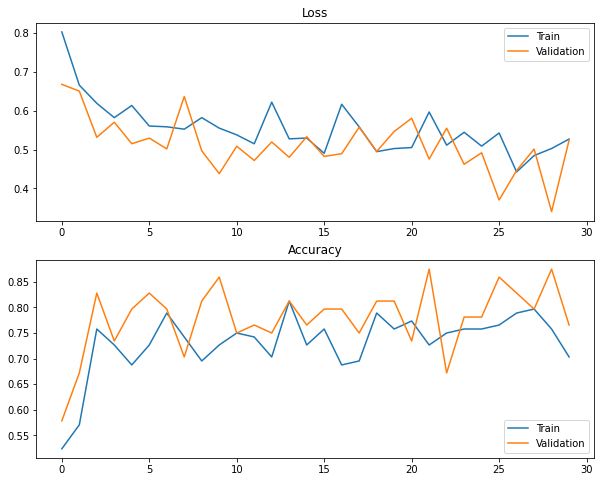

In [24]:
#for history
fig, ax = plt.subplots(2, 1, figsize=(10,8))

ax[0].plot(history.history["loss"], label="Train")
ax[0].plot(history.history["val_loss"], label="Validation")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], label="Train")
ax[1].plot(history.history["val_accuracy"], label="Validation")
ax[1].title.set_text("Accuracy")
ax[1].legend()

plt.show()

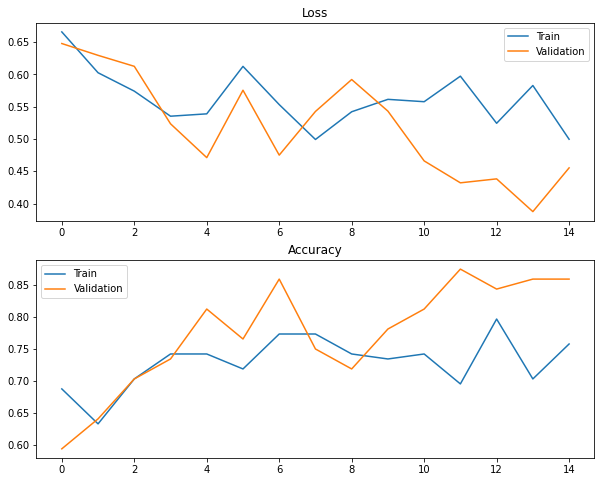

In [25]:
#for history1
fig, ax = plt.subplots(2, 1, figsize=(10,8))

ax[0].plot(history1.history["loss"], label="Train")
ax[0].plot(history1.history["val_loss"], label="Validation")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(history1.history["accuracy"], label="Train")
ax[1].plot(history1.history["val_accuracy"], label="Validation")
ax[1].title.set_text("Accuracy")
ax[1].legend()

plt.show()

# Results

In [26]:
bin_acc = BinaryAccuracy()
recall = Recall()
precision = Precision()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = cnn.predict(X)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
    precision.update_state(y, yhat)

print("Accuracy:", bin_acc.result().numpy(), "\nRecall:", recall.result().numpy(), "\nPrecision:", precision.result().numpy())

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Accuracy: 0.88577586 
Recall: 0.9444444 
Precision: 0.8717949


# Manual Testing

We have already evaluated our model using various metrics and visualizations but it is always a good practice to test the model by hand to make sure everything is working well. In the code below, I randomly chose an image and plotted it with its true label on title so let's see if our model is going to classify this example correctly.

In [27]:
batch = test.as_numpy_iterator().next()

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


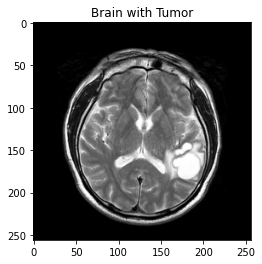

In [28]:
img, label = batch[0][15], batch[1][15]
plt.imshow(img)
if label==1:
    plt.title("Brain with Tumor")
else:
    plt.title("Brain with No Tumor")
plt.show()

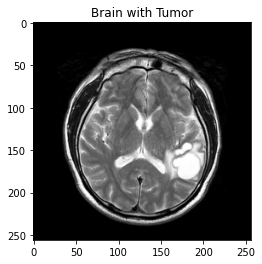

In [29]:
#Triying to rectangle
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Assuming img is your single image and label is the label (1 for tumor, 0 for no tumor)
img, label = batch[0][15], batch[1][15]

plt.imshow(img)
if label == 1:
    plt.title("Brain with Tumor")
    
    # If the label is 1 (indicating a tumor), create a binary mask
    binary_mask = (img[:, :, 0] > 128).astype(np.uint8)  # Convert to binary

    # Find contours of the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Draw a bounding rectangle around the largest contour (tumor area)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Ensure that the binary mask is of the same size as the image
        binary_mask = cv2.resize(binary_mask, (img.shape[1], img.shape[0]))

        # Apply the binary mask to the image for visualization
        img_with_mask = cv2.addWeighted(img, 1, cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR), 0.3, 0)
        
        # Draw the bounding rectangle on the image with the mask
        cv2.rectangle(img_with_mask, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
        plt.imshow(img_with_mask)
else:
    plt.title("Brain with No Tumor")

plt.show()


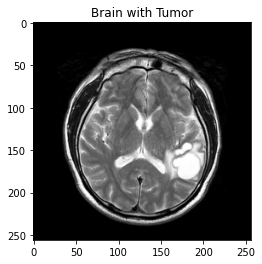

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Assuming img is your single image and label is the label (1 for tumor, 0 for no tumor)
img, label = batch[0][15], batch[1][15]

plt.imshow(img)
if label == 1:
    plt.title("Brain with Tumor")

    # If the label is 1 (indicating a tumor), create a binary mask
    binary_mask = (img[:, :, 0] > 128).astype(np.uint8)  # Convert to binary

    # Find contours of the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Draw a bounding rectangle around the largest contour (tumor area)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Ensure that the binary mask is of the same size as the image
        binary_mask = cv2.resize(binary_mask, (img.shape[1], img.shape[0]))

        # Apply the binary mask to the image for visualization
        img_with_mask = cv2.addWeighted(img, 1, cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR), 0.3, 0)
        
        # Draw the bounding rectangle on the image with the mask
        cv2.rectangle(img_with_mask, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
        plt.imshow(img_with_mask)
else:
    plt.title("Brain with No Tumor")

plt.show()


In [34]:
y_hat = model.predict(np.expand_dims(img, 0))

We are able to see the probability of this brain's having tumor below. I opted to determine the classification threshold as 0.5. Meaning that, if it is below 0.5 this will be classified as Brain Having No Tumor otherwise it is going to be classified as Brain Having Tumor.

In [35]:
y_hat

array([[0.17669949]], dtype=float32)

In [36]:
if y_hat < 0.5:
    print("No tumor detected")
else:
    print("Tumor detected")

No tumor detected


Here we can see that our model predicted its class correctly.

## Thank you so much for reading this notebook. Preparing the notebook took me a great deal of time. I hope it helps. If you liked this notebook, please do not forget to give an upvote. Peace Out ✌️...